In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
from catboost import CatBoostClassifier

In [2]:
# Path to the folder containing CSV files
folder_path = 'CIC2017'
'''
# List to hold DataFrames
dfs = []

# Loop through all files in the folder
for file in os.listdir(folder_path):
    print(file)
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        # Read the CSV file into a DataFrame and append it to the list
        df = pd.read_csv(file_path, low_memory=False)
        
        print(df.shape)
        #if file=='Ransomware-All.csv':
        #    continue
        dfs.append(df.iloc[:50000])
        print(len(dfs))

# Concatenate all DataFrames into a single DataFrame
print('concating')
'''
#df = pd.read_csv(, ignore_index=True)
df = pd.read_csv("Phishing_Legitimate_full.csv", low_memory=False)


In [3]:
set(df['CLASS_LABEL'].values)

{0, 1}

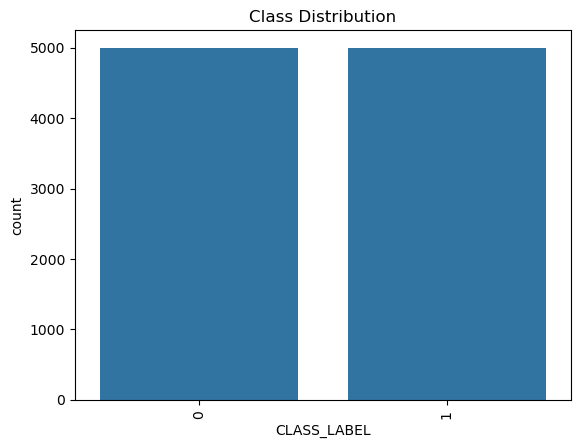

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='CLASS_LABEL', data=df)  # Replace 'class_column' with the label column
plt.title('Class Distribution')
plt.xticks(rotation=90)
plt.show()


In [5]:
#data preprocessing
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()
df = df.drop_duplicates(keep='first')

In [6]:
df.isnull().sum()

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


In [7]:
df.shape

(10000, 50)

In [8]:
print(df.columns)


Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperl

In [9]:
# Split the data into training and testing sets
from sklearn.decomposition import PCA
#top_n_features=top_n_features_df['Feature'].values.tolist()
#top_n_features.append('Label')
#df = df[top_n_features]
X = df.drop(columns=['CLASS_LABEL','id'])#,' Label',' Flow IAT Min',' Packet Length Std',' CWE Flag Count',' Down/Up Ratio','Fwd Avg Bytes/Bulk'])  # Replace with your feature columns
y = df['CLASS_LABEL']   # Replace with your target column

#X = X.select_dtypes(include=['number'])
# Apply PCA to DSAE features
#pca = PCA(n_components=20)  # Choose the number of components based on explained variance
#X = pca.fit_transform(X)
#X[' Protocol'] = df[' Protocol'].astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.to_csv("Xtrain.csv")
y_train.to_csv("ytrain.csv")
X_test.to_csv("Xtest.csv")
y_test.to_csv("ytest.csv")




In [10]:
threshold = 10  # Customize this based on your data

numerical_features = []
categorical_features = []

# Check the type of the problematic column
for col in X.columns:
    if X[col].dtype=='object':
        categorical_features.append(col)
print(categorical_features)

[]


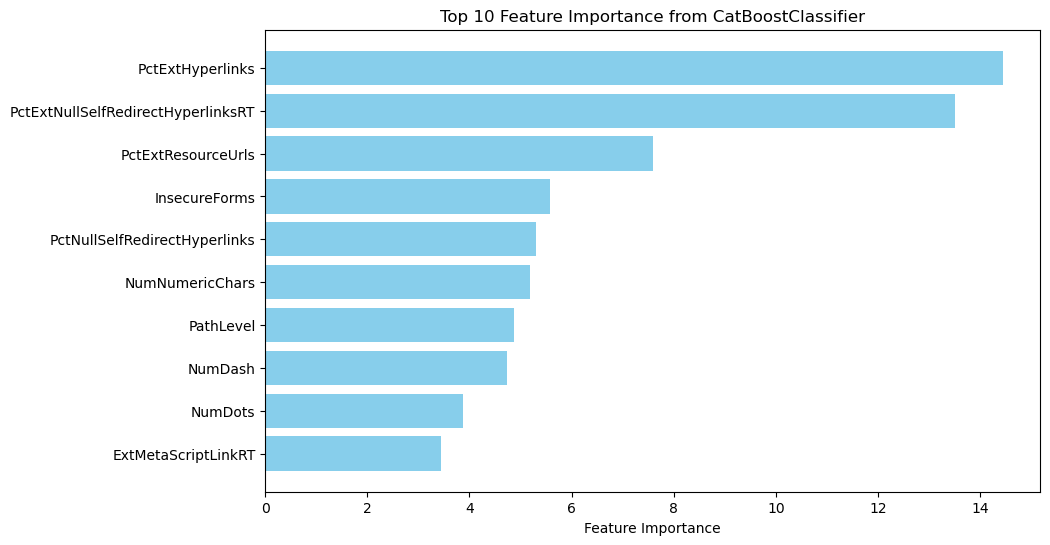

In [11]:

# Initialize and train CatBoostClassifier
model = CatBoostClassifier(iterations=200, depth=10, learning_rate=0.1, random_seed=42)
model.fit(X, y, cat_features=categorical_features, verbose=0)


# Get feature importance
feature_importance = model.get_feature_importance()

# Create a DataFrame to store feature names and their corresponding importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot top 10 most important features
top_10_features = feature_importance_df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importance from CatBoostClassifier')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()


In [12]:
top_10_features.head()

,Feature,Importance
26,PctExtHyperlinks,14.453489
47,PctExtNullSelfRedirectHyperlinksRT,13.501671
27,PctExtResourceUrls,7.591581
29,InsecureForms,5.579646
33,PctNullSelfRedirectHyperlinks,5.304209


In [13]:
from catboost import CatBoostClassifier
import time
from datetime import timedelta
time1=time.time()
model = CatBoostClassifier(iterations=200, depth=10, learning_rate=0.05, random_seed=42)
model.fit(X_train, y_train, cat_features=categorical_features, verbose=0)
time2=time.time()

y_pred = model.predict(X_test)
time3=time.time()
train_time = time2-time1 
test_time = time3-time2 
print("train time is " ,str(timedelta(seconds=(train_time))))
print("test time is " ,str(timedelta(seconds=(test_time))))

train time is  0:00:03.765105
test time is  0:00:00.089011


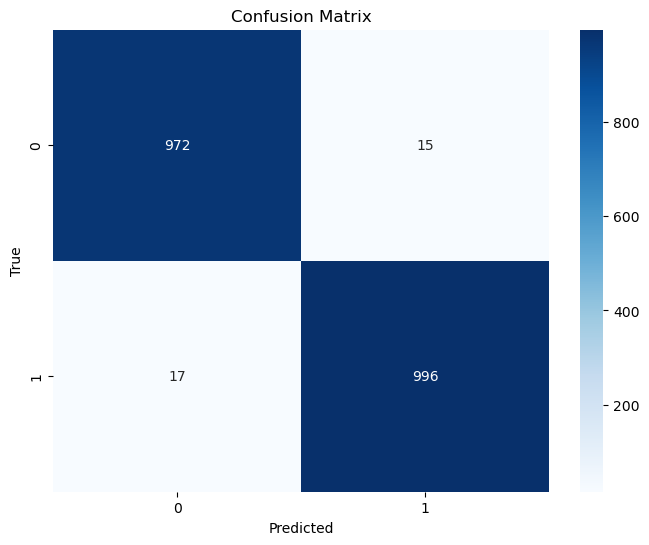

In [14]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
classes=list(set(y_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [15]:
from sklearn.metrics import classification_report
# Generate and print the classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       987
           1       0.99      0.98      0.98      1013

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Calculate Accuracy, Precision, Recall, and F1-Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='macro')
recall = recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')

# Display the results
print(f"Accuracy: {accuracy:.6f}")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")


Accuracy: 0.984000
Precision: 0.983987
Recall: 0.984010
F1-Score: 0.983998
